<h2>Pull the latest nexrad file from Amazon S3 Services and open the file in ARTview.</h2>
<i>Note: Modified methodology from https://eng.climate.com/2015/10/27/how-to-read-and-display-nexrad-on-aws-using-python/</i>

In [1]:
import os
import urllib2
import pyart
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import artview
#import pyart.graph
import tempfile
import boto
#import boto3

%matplotlib inline

/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/Users/guy/anaconda/lib/python2.7/site-packages/pyart/io/grid_io.py:409: DeprecationWarning: read_legacy_grid is deprecated and will be removed in a future version of Py-ART
  "version of Py-ART", DeprecationWarning)
/Users/guy/anaconda/lib/python2.7/site-packages/pyart/io/grid_io.py:409: DeprecationWarning: read_legacy_grid is deprecated and will be removed in a future version of Py-ART
  "version of Py-ART", DeprecationWarning)
/Users/guy/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1

<b>Create a class for accessing and plotting latest radar image</b>

In [50]:
class Get88D(object):
    """
    A class mentod to retrieve and plot NEXRAD data from AWS NOAA NEXRAD S3 bucket archive.
    """
    def __init__(self, radarID):
        '''Initialize the class'''

        # Set date formats to be used with datetime
        self.d_fmt = "%Y-%m-%dT%H:%M"
        self.dout_fmt = "%Y-%m-%d_%H:%M"
        
        # Use passed arguments
        self.radarID = radarID

    def get_latest(self, verbose=False):
        '''
        Return latest NEXRAD data to a local file.
        '''
        nowdate,nowtime = dt.strftime(dt.now(), self.d_fmt).split('T')
        yyyy, mm, dd = nowdate.split('-')
        hh, nn = nowtime.split(':')
            
        # Create a connection with S3 server, without needed AWS credentials
        s3conn = boto.connect_s3(anon=True)
        # Construct the bucket name, query the S3 bucket
        bucket_query = '%s/%s/%s/%s/%s'%(yyyy, mm, dd,self.radarID, self.radarID)
        bucket = s3conn.get_bucket('noaa-nexrad-level2')
        # Create a list of keys according the information
        self.list88D = bucket.list(prefix=bucket_query)
        s3keylist = [key for key in self.list88D.__iter__()]

        if verbose:
            print("Queried S3 bucket for %s...\n"%bucket_query)
            print("Retrieving %s\n"%s3keylist[-1].key.split('/')[-1])

        # Now grab the latest data file and save it locally to open
        with open("latest88D.bz", "wb") as code:
            s3keylist[-1].get_contents_to_file(code)

    def get_archive(self, year, month, day, hhmm=None, file_index=-1, verbose=False):
        '''
        Return archived NEXRAD data to a local file.
        
        Parameters
        ----------
        year: str
            4-character year for inquery (e.g. '2012').
        month: str
            2-character month for inquery (e.g. '06').
        day: str
            2-character day for inquery (e.g. '28').
        hhmm : str
            4-character hour and minute (UTC) for inquery (e.g. '0325').
            Any number of characters can be used for search, for example if
            only '032' is input all scans with a time '032x' will be found.
            If None is provided, defaults to last file found (latest time).
        '''
        # Create a connection with S3 server, without needed AWS credentials
        s3conn = boto.connect_s3(anon=True)
        # Construct the bucket name, query the S3 bucket
        if hhmm is not None:
            bucket_query = '%s/%s/%s/%s/%s%s%s%s_%s'%(
                year, month, day, self.radarID, self.radarID, year, month, day, hhmm)
        else:
            bucket_query = '%s/%s/%s/%s/%s%s%s%s'%(
                year, month, day, self.radarID, self.radarID, year, month, day)

        bucket = s3conn.get_bucket('noaa-nexrad-level2')
        # Create a list of keys according the information
        self.list88D = bucket.list(prefix=bucket_query)
        s3keylist = [key for key in self.list88D.__iter__()]
        s3filenames = [fname.key.split('/')[-1] for fname in s3keylist]

        if verbose:
            print("Queried S3 bucket for %s...\n"%bucket_query)
            print("Found the following files...")
            print(s3filenames)
            print("\n")
            print("Retrieving %s\n"%s3keylist[file_index].key.split('/')[-1])

        # Now grab the latest data file and save it locally to open
        with open("latest88D.bz", "wb") as code:
            s3keylist[file_index].get_contents_to_file(code)

    def get_archive_thredds(self, year, month, day, hhmm=None, file_index=-1, verbose=False):
        '''
        Function to return NEXRAD data from the AWS NOAA NEXRAD S3 bucket
        to a local file for work.
        
        Parameters
        ----------
        year: str
            4-character year for inquery (e.g. '2012').
        month: str
            2-character month for inquery (e.g. '06').
        day: str
            2-character day for inquery (e.g. '28').
        hhmm : str
            4-character hour and minute (UTC) for inquery (e.g. '0325').
            Any number of characters can be used for search, for example if
            only '032' is input all scans with a time '032x' will be found.
            If None is provided, defaults to last file found (latest time).
        '''
        #Check to see if year, month, day is provided
        
##        SERVICE = "http://thredds.ucar.edu/thredds/catalog/nexrad/level2/"
##        nexurl = '%s/%s/'%(SERVICE, self.radarID)
##        nexurl = '%s%s/%s'%(SERVICE, self.radarID, "catalog.html")
##        if yyyymmdd is None:
##            response = urllib2.urlopen("%s"%(nexurl))
##        else:
##            response = urllib2.urlopen("%s/%s"%(nexurl, yyyymmdd))
##        self.list88D = response.read().split("\n")
        
        # Now grab the latest data file and save it locally to open
#        if latest:
#            with open("latest88D.bz", "wb") as code:
#                s3keylist[-1].get_contents_to_file(code)

        if verbose:
            print("Queried THREDDS server for %s...\n"%bucket_query)
            print("Found the following files...")
            print(self.list88D)
            print("\n")
            print("Retrieving %s\n"%self.list88D[file_index].key.split('/')[-1])

    def plot(self, vmin=None, vmax=None, xlims=None, ylims=None):
        '''Create a plot'''
        # Create a PyArt radar instance
        fig, ax = plt.subplots()
        #ax = plt.axes()
        self.r=pyart.io.read_nexrad_archive("latest88D.bz")
        d=pyart.graph.RadarDisplay(self.r)
        d.plot('reflectivity',0, vmin=vmin, vmax=vmax, cmap="pyart_Carbone42")
        if xlims is None:
            xlims = (-250., 250)
        if ylims is None:
            ylims = (-250., 250)
        d.set_limits(xlims, ylims)
        
    def remove_bz(self):
        os.remove("latest88D.bz")

<b>Now lets make a current plot!</b>

Queried S3 bucket for 2016/07/28/KUDX/KUDX...

Retrieving KUDX20160728_161206_V06



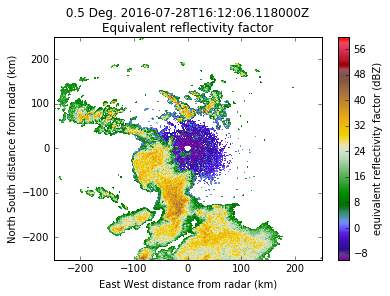

In [51]:
radarID = "KUDX"#KCYS"
Radar = Get88D(radarID)
Radar.get_latest(verbose=True)
Radar.plot(vmin=-10, vmax=60.)
Radar.remove_bz()

<b> Now we can open using ARTView to access features via GUI</b>

In [6]:
artview.view.view(Radar.r)

Changed Scan types, reinitializing


In [7]:
keylist = [key for key in Radar.list88D.__iter__()]

In [11]:
dir(keylist[-1])

['BufferSize',
 'Contents',
 'DefaultContentType',
 'RestoreBody',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__iter__',
 '__module__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_base64md5',
 '_get_file_internal',
 '_get_key',
 '_get_md5',
 '_get_remote_metadata',
 '_get_storage_class',
 '_normalize_metadata',
 '_send_file_internal',
 '_set_base64md5',
 '_set_key',
 '_set_md5',
 '_set_storage_class',
 '_storage_class',
 '_underscore_base_user_settable_fields',
 'add_email_grant',
 'add_user_grant',
 'base64md5',
 'base_fields',
 'base_user_settable_fields',
 'bucket',
 'cache_control',
 'change_storage_class',
 'close',
 'closed',
 'compute_md5',
 'content_disposition',
 'content_encoding',
 'content_language',
 'content_type',
 'copy',
 'delete',
 'delete_marker',
 'encrypted',
 'endElement',
 'et

Queried S3 bucket for 2013/05/20/KTLX/KTLX20130520_203...

Found the following files...
[u'KTLX20130520_203346_V06.gz', u'KTLX20130520_203800_V06.gz']


Retrieving KTLX20130520_203800_V06.gz



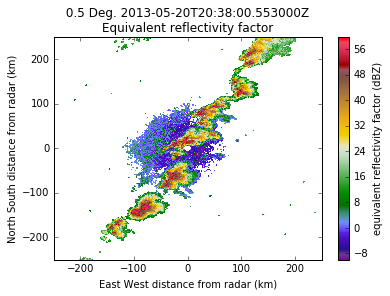

In [52]:
radarID = "KTLX"
Rarch = Get88D(radarID)
Rarch.get_archive('2013', '05', '20', hhmm='203', verbose=True)
Rarch.plot(vmin=-10, vmax=60.)
Rarch.remove_bz()

In [53]:
artview.view.view(Rarch.r)

Changed Scan types, reinitializing
{'xmin': -321.071892264, 'ymin': -307.440577483, 'ymax': 335.636065517, 'xmax': 322.004750736}
{'xmin': -321.071892264, 'ymin': -307.440577483, 'ymax': 335.636065517, 'xmax': 322.004750736}
{'xmin': -321.071892264, 'ymin': -307.440577483, 'ymax': 335.636065517, 'xmax': 322.004750736}
